In [1]:
import glob
import os
import warnings

import librosa
import librosa.display
import matplotlib.pylab as plt
import numpy as np

warnings.filterwarnings('ignore')

from utils import FMA_RAW, DATA_FOLDER, compute_mfcc, load_tracks

# RAW audio analysis

In [2]:
files = glob.glob(os.path.join(FMA_RAW, "**/*.mp3"), recursive=True)

In [3]:
def plot_signal(filepath, seconds=10, title=None):
    y, sr = librosa.load(filepath, sr=None, mono=True)

    y = y[:sr * seconds]

    fft = np.abs(np.fft.fft(y))
    stft = librosa.stft(y, hop_length=512)
    mel = librosa.feature.melspectrogram(sr=sr, S=np.abs(stft) ** 2)
    stft_log = librosa.amplitude_to_db(np.abs(stft))
    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(mel), n_mfcc=13)

    fig, axes = plt.subplots(5, 1, figsize=(10, 8))
    librosa.display.waveshow(y, sr=sr, ax=axes[0], x_axis="time")
    axes[1].plot(np.linspace(0, sr, len(fft))[:int(len(fft) / 2)], fft[:int(len(fft) / 2)])
    librosa.display.specshow(stft_log, sr=sr, ax=axes[2], x_axis="time", y_axis="hz")
    librosa.display.specshow(mel, sr=sr, ax=axes[3], x_axis="time", y_axis="mel")
    librosa.display.specshow(mfcc, sr=sr, ax=axes[4], x_axis="time")
    fig.suptitle(title)
    fig.tight_layout()
    fig.show()


def plot_mfcc(filepath, sr=44100, seconds=10, title=None):
    fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex='all', sharey='all')
    mfcc_delta = compute_mfcc(filepath, duration=seconds)
    librosa.display.specshow(mfcc_delta[0:13, :], sr=sr, ax=axes[0], x_axis="time")
    librosa.display.specshow(mfcc_delta[13:26, :], sr=sr, ax=axes[1], x_axis="time")
    librosa.display.specshow(mfcc_delta[26:, :], sr=sr, ax=axes[2], x_axis="time")
    fig.suptitle(title)
    fig.show()

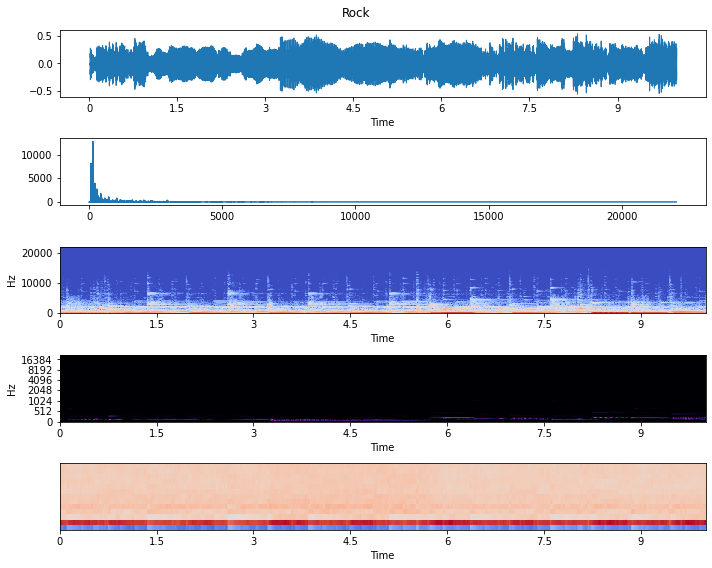

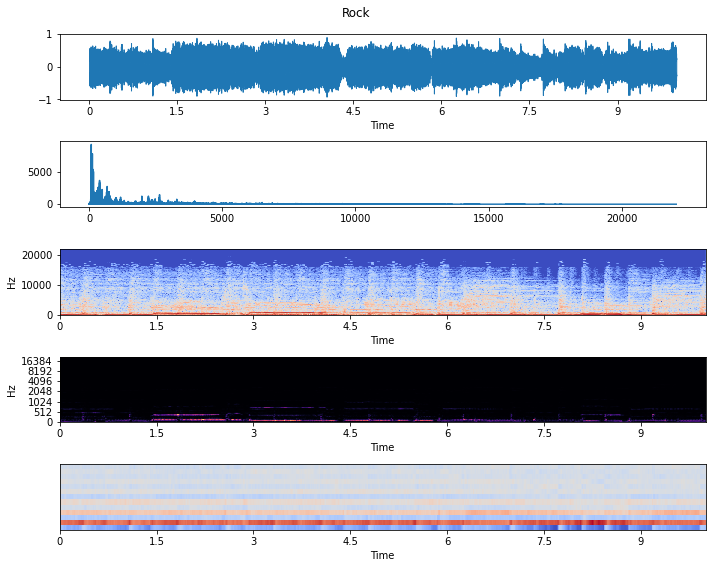

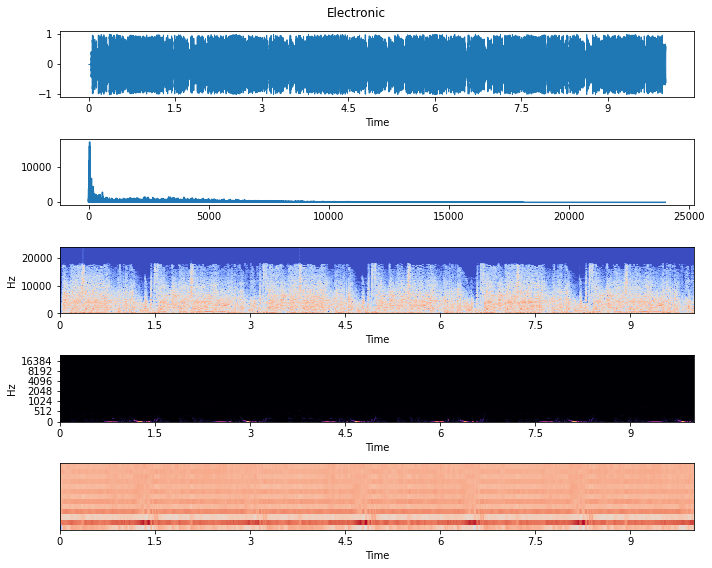

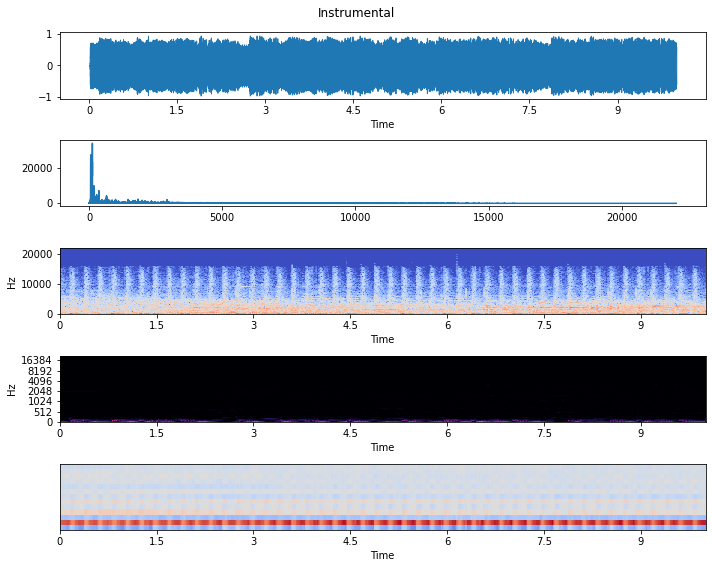

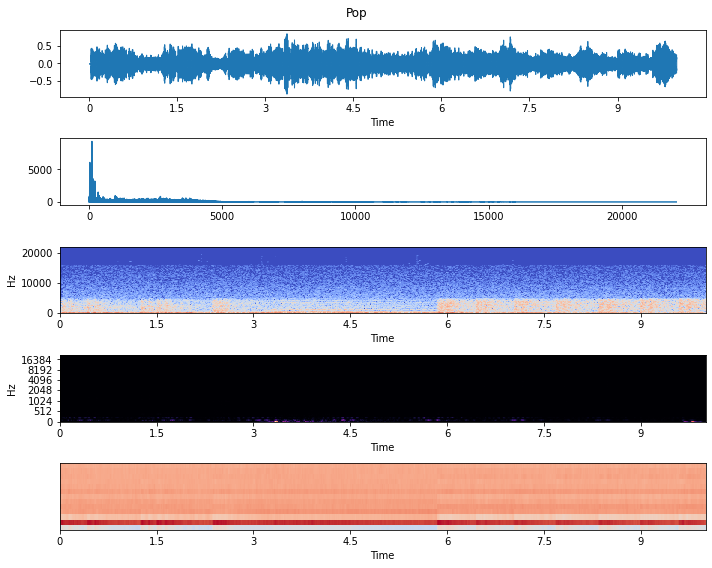

In [4]:
plot_signal(files[0], title="Rock")
plot_signal(files[25], title="Rock")
plot_signal(files[1], title="Electronic")
plot_signal(files[23], title="Instrumental")
plot_signal(files[99], title="Pop")

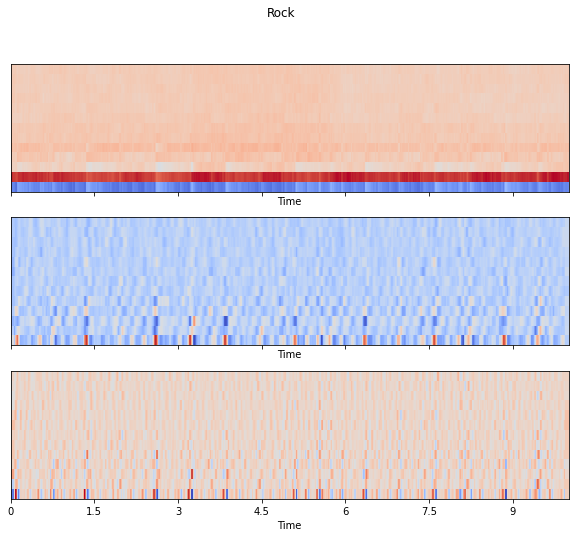

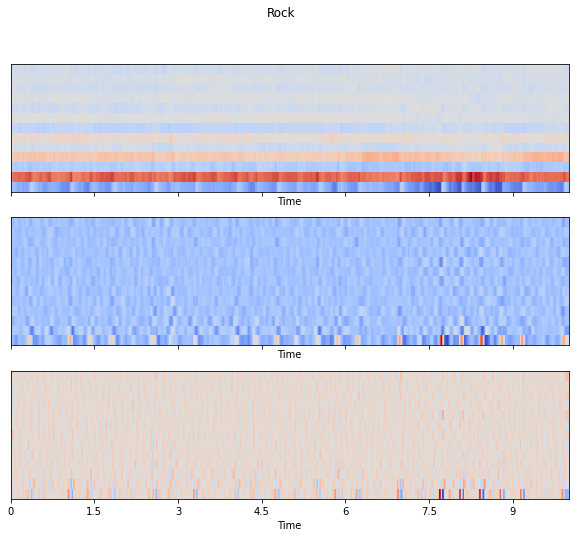

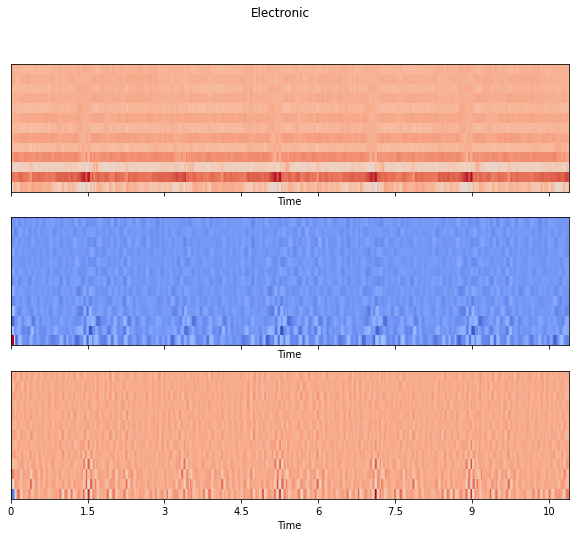

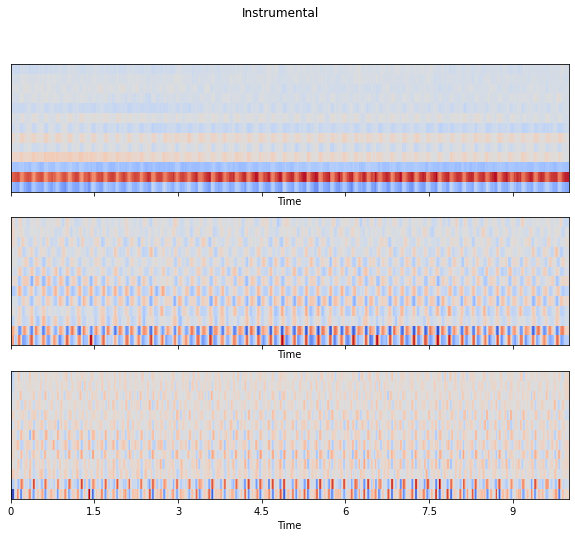

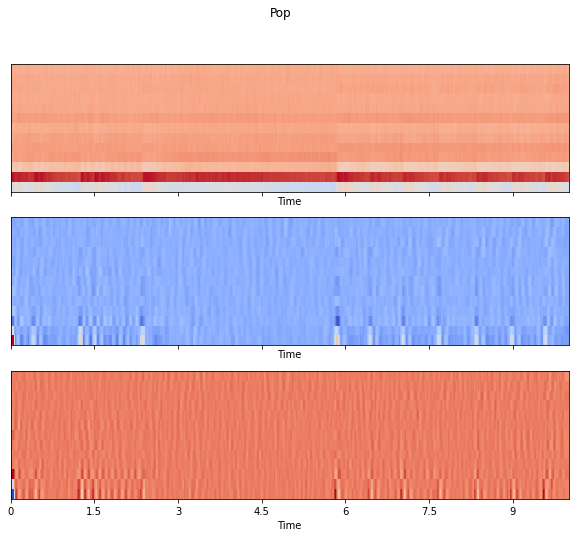

In [5]:
plot_mfcc(files[0], title="Rock")
plot_mfcc(files[25], title="Rock")
plot_mfcc(files[1], title="Electronic")
plot_mfcc(files[23], title="Instrumental")
plot_mfcc(files[99], title="Pop")

# Genres Distribution and Splits

In [27]:
tracks = load_tracks(DATA_FOLDER)

training = tracks['set', 'split'] == "training"
sm_tracks = tracks.loc[tracks['set', 'subset'] <= 'small']
md_tracks = tracks.loc[tracks['set', 'subset'] <= 'medium']

sm_values, sm_counts = np.unique(sm_tracks.loc[training]['track', 'genre_top'], return_counts=True)
md_values, md_counts = np.unique(md_tracks.loc[training]['track', 'genre_top'], return_counts=True)

sorted_idx = np.argsort(md_counts)

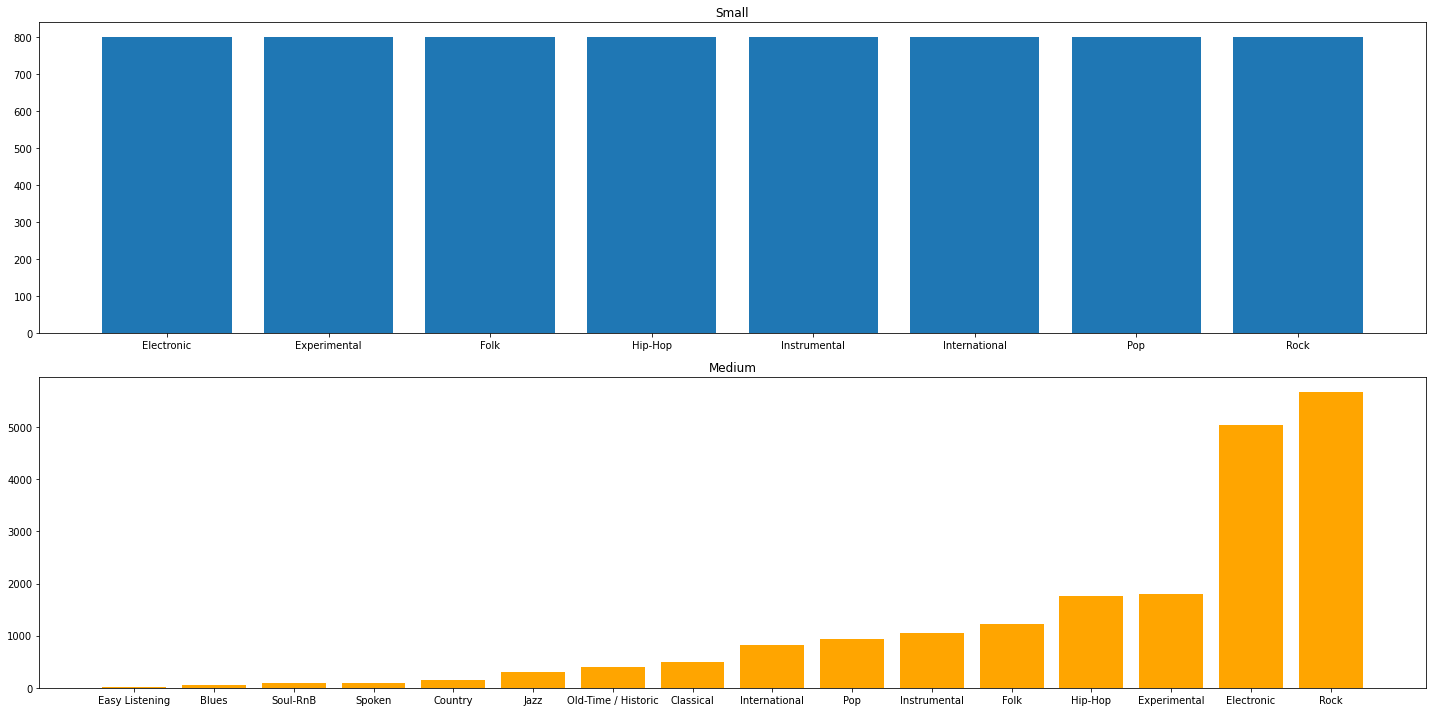

In [28]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))
ax1.bar(sm_values, sm_counts)
ax1.set_title("Small")
ax2.bar(md_values[sorted_idx], md_counts[sorted_idx], color='orange')
ax2.set_title("Medium")
fig.tight_layout()

In [29]:
# dataset split percentages
print("[Small]")
print(sm_tracks['set', 'split'].value_counts(normalize=True))

print("\n[Medium]")
print(md_tracks['set', 'split'].value_counts(normalize=True))

[Small]
training      0.8
validation    0.1
test          0.1
Name: (set, split), dtype: float64

[Medium]
training      0.79688
test          0.10292
validation    0.10020
Name: (set, split), dtype: float64
